## 머신러닝

### 1. 데이터 전처리

#### 1-1 데이터의 특징을 파악하시오. (EDA)

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/27_problem1.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount,Class
0,60.0,1.069141,0.043786,0.309867,1.316694,-0.462394,-0.857888,0.207904,-0.191270,0.056398,0.041567,-0.507358,-0.108666,-0.473257,0.452046,1.005675,0.185441,-0.439976,89.40,0
1,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,0.00,1
2,426.0,-1.932055,1.724618,1.288229,-0.396998,-0.140202,2.470521,-1.865298,-5.186855,0.794764,0.155379,0.034517,0.906738,-0.027172,-0.404303,-0.473949,0.274034,-0.222340,16.19,0
3,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,529.00,1
4,674.0,-0.719065,0.638954,0.686335,-0.023240,2.317890,3.871978,-0.312797,1.089780,-0.596925,-0.006142,-0.242883,-0.384491,0.109079,0.187565,1.823472,0.274346,-0.697730,22.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,172266.0,1.880157,-0.485374,0.095951,0.473297,-1.277631,-1.163752,-0.530703,-0.188080,1.340928,-0.242598,-0.032176,1.189035,0.778034,-0.327769,0.351492,-0.213423,-0.176871,35.00,0
1189,172288.0,2.100535,-0.014620,-1.602113,0.184332,0.383228,-0.768377,0.207428,-0.299064,0.584681,0.003055,-0.965941,0.225244,0.274983,0.428356,0.793141,-0.104875,-0.647107,4.49,0
1190,172329.0,2.078542,-1.119785,-0.338306,-0.727997,-1.330486,-0.669741,-1.068741,-0.125540,0.191309,0.706048,-0.754812,-0.291895,0.614961,-0.634456,0.267806,1.148287,0.127145,47.22,0
1191,172539.0,-5.823560,0.333130,-0.732746,0.770116,-3.785871,2.124706,-2.272833,2.896201,0.552732,1.113104,-1.554701,1.183078,0.287108,-0.023928,-1.800240,-1.032457,0.975180,150.00,0


In [2]:
data.info() # 모든 데이터가 수치형, 결측치가 없다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1193 non-null   float64
 1   V1      1193 non-null   float64
 2   V2      1193 non-null   float64
 3   V3      1193 non-null   float64
 4   V4      1193 non-null   float64
 5   V5      1193 non-null   float64
 6   V6      1193 non-null   float64
 7   V7      1193 non-null   float64
 8   V8      1193 non-null   float64
 9   V9      1193 non-null   float64
 10  V10     1193 non-null   float64
 11  V11     1193 non-null   float64
 12  V12     1193 non-null   float64
 13  V13     1193 non-null   float64
 14  V14     1193 non-null   float64
 15  V15     1193 non-null   float64
 16  V16     1193 non-null   float64
 17  V17     1193 non-null   float64
 18  Amount  1193 non-null   float64
 19  Class   1193 non-null   int64  
dtypes: float64(19), int64(1)
memory usage: 186.5 KB


종속변수는 Class 이고 나머지 변수는 독립변수이다.  
모든 독립변수가 수치형 변수이다.  
종속변수 Class 는 0, 1인 범주형 변수이므로 종속변수에 따른 독립변수의 분포를 살펴보자.

In [3]:
data.Class.value_counts() # 종속변수인 Class 는 0, 1로 구분되고 비율이 0과 1이 약 5대1 정도로 차이난다.

Class
0    993
1    200
Name: count, dtype: int64

<Axes: xlabel='col', ylabel='value'>

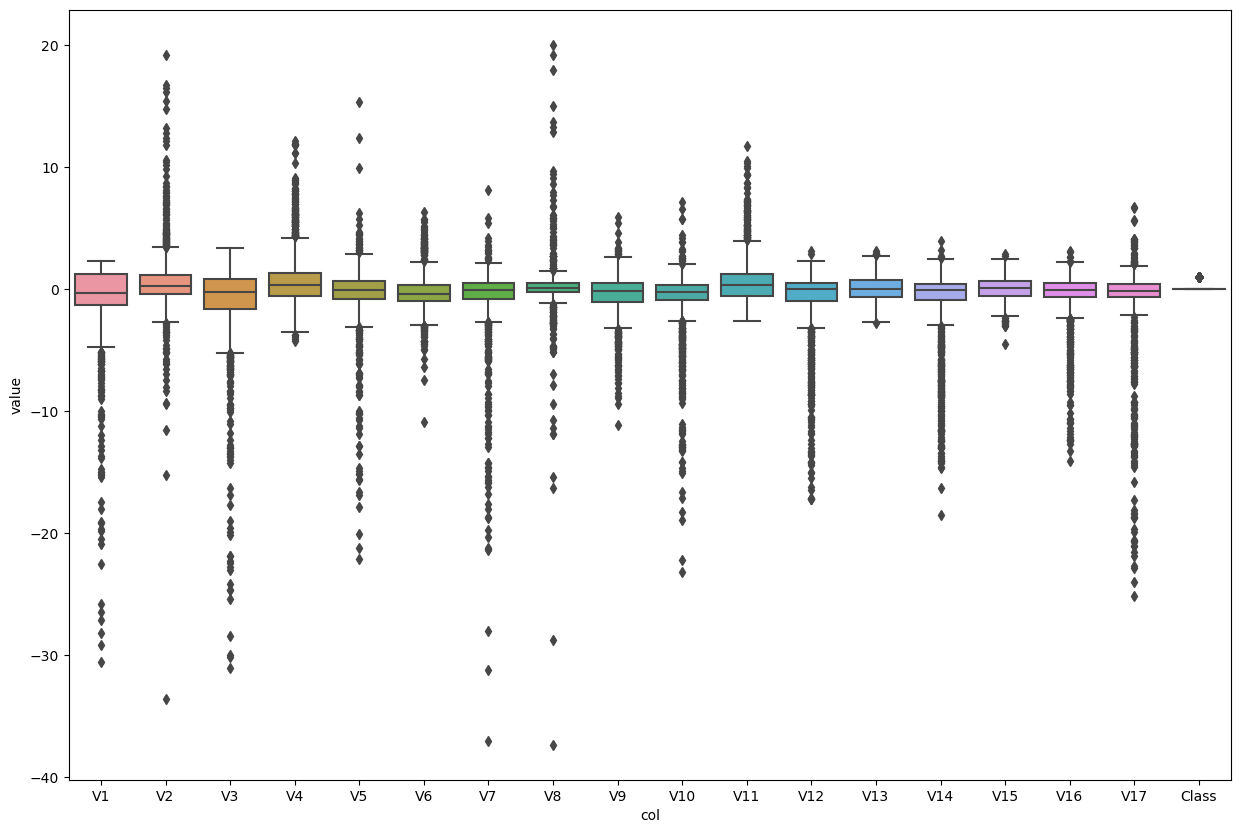

In [4]:
# 수치형 변수들의 분포가 어떻게 되어있는지 확인해보자.
# amount 의 경우 다른 변수와 데이터의 범위 차이가 크므로 Amount 를 제외한 변수들 먼저 시각화해보자.
import matplotlib.pyplot as plt
import seaborn as sns

X = data.drop(['Time', 'Amount'], axis = 1)

df_melt = pd.melt(X, var_name= 'col', value_name='value')

plt.figure(figsize = (15, 10))
sns.boxplot(data = df_melt, x = 'col', y = 'value')

# 이상치가 많이 보이는 것을 알 수 있으며, 이 이상치들이 사기 행위와 관련이 있다고 유추할 수 있다.

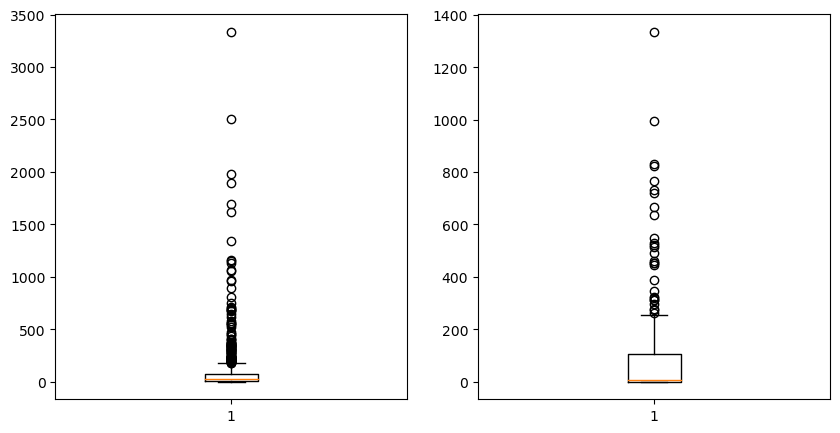

In [5]:
# Class 의 범주별로 거래금액이 어떻게 분포되어있는지 확인하자.
amount_0 = data[data.Class == 0]['Amount']
amount_1 = data[data.Class == 1]['Amount']

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2,figsize = (10, 5))
axes[0].boxplot(amount_0)
axes[1].boxplot(amount_1)

plt.show()

In [6]:
data.groupby('Class')['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,993.0,85.187613,223.111383,0.0,4.99,23.000,74.0000,3335.73
1,200.0,107.246700,204.294147,0.0,1.00,7.805,104.2025,1335.00


#### 1-2 상관관계를 시각화하고 전처리가 필요함을 설명하시오.

<Axes: >

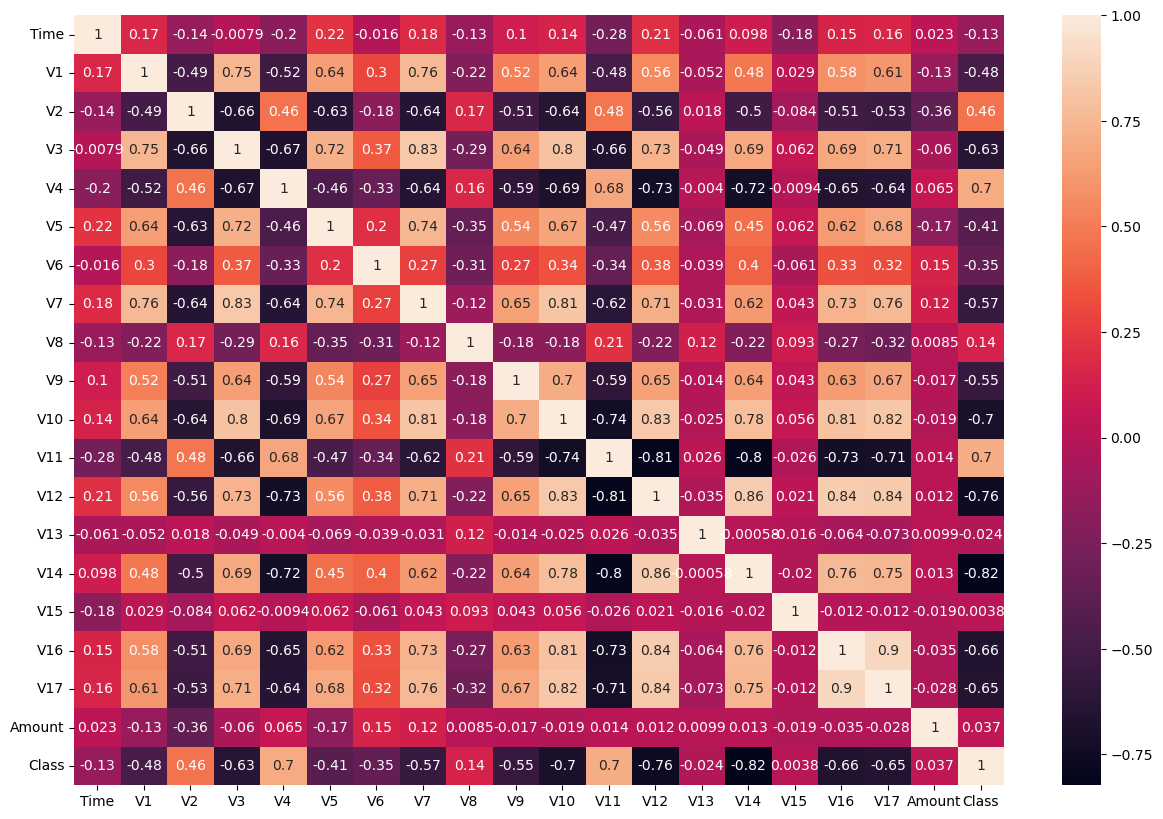

In [7]:
correlation = data.corr()

plt.subplots(figsize = (15, 10))
sns.heatmap(correlation, annot= True)

# 상관계수가 0.9 이상의 강한 상관관계를 가지는 변수들은 존재하지 않지만 상관계수가 0.7 이상의 상관관계를 가지는 변수들이 존재하므로 차원축소가 필요하다고 판단된다.

### 2. 차원축소

#### 2-1 차원 축소 방법 2가지 이상을 비교하고 한 가지를 선택하시오.

PCA
+ 데이터에 여러 변수들이 있을 때, 이 변수들을 선형결합하여 새로운 주성분을 생성하고 변수를 축소하는 기법이다.
+ 변수들의 성격을 알 수 없을 때 사용하기 좋은 방법이며, 상관성이 강한 변수들의 의미가 주성분에 포함된다.

변수선택법
+ 여러 변수들이 있을 때 AIC나 BIC 등의 지표를 기준으로 종속변수에 유의미한 영향을 미치는 변수들을 선택하는 방법이다.
+ 이 방법은 변수들끼리의 다중공선성이 적고 변수에 대한 설명이 명확할 때 사용하기 좋은 기법이다.

PCA 를 선택하겠다.

#### 2-2 위에서 선택한 방법을 실제로 수행하고, 선택한 이유를 설명하시오.

이 데이터에서는 변수들끼리 상관성이 존재하며, V1 ~ V17 의 데이터가 명확하지 않으니 PCA가 적합하다고 생각된다.

In [47]:
# Amount 와 나머지 변수들간의 데이터 범위 차이가 크므로 스케일링을 해주자.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['scaled_Amount'] = scaler.fit_transform(data[['Amount']])

In [49]:
# 차원 축소할 데이터를 뽑아보자.
from sklearn.decomposition import PCA

data1 = data.drop(['Time', 'Amount', 'Class'], axis = 1)

pca = PCA(n_components=18)
pca.fit(data1)

PCA(n_components=18)

고유 값 : [313.34445441 108.14928236  88.31546717  75.94330818  74.04090721
  54.36672672  48.53042316  44.38880194  42.8659386   41.21711671
  40.00442193  37.72250446  35.89818828  34.2995261   33.25122834
  30.1026417   28.27667222   1.19834215]
분산 설명력 : [6.63190775e-01 7.90026637e-02 5.26826960e-02 3.89559208e-02
 3.70286530e-02 1.99646096e-02 1.59082573e-02 1.33088735e-02
 1.24113529e-02 1.14749200e-02 1.08096205e-02 9.61159556e-03
 8.70441348e-03 7.94640490e-03 7.46809506e-03 6.12073630e-03
 5.40071234e-03 9.69965136e-06]


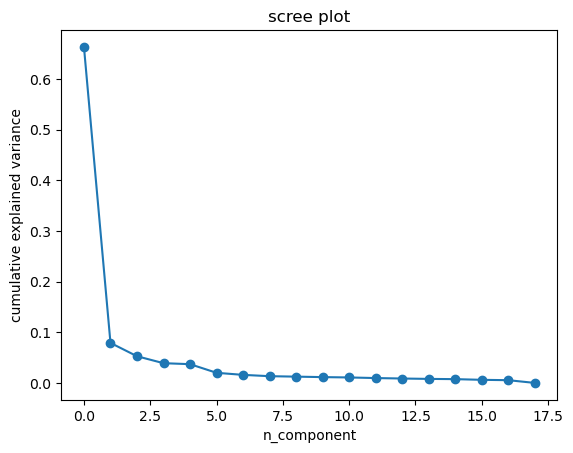

In [53]:
print('고유 값 :', pca.singular_values_)
print('분산 설명력 :', pca.explained_variance_ratio_)

## Scree plot 으로 주성분 수 구하기
plt.plot(pca.explained_variance_ratio_, 'o-')
plt.title('scree plot')
plt.xlabel('n_component')
plt.ylabel('cumulative explained variance')
plt.show()

In [80]:
# 누적 분산설명력이 0.8 이상이 되도록 하는 주성분 수를 찾자.

var = pca.explained_variance_ratio_
cumulative_var = [sum(var[:i+1]) for i in range(len(var))]
var
var_exp = pd.concat([pd.DataFrame(var),pd.DataFrame(cumulative_var)], axis = 1)
var_exp.columns = ['var_exp', 'cumulative_var_exp']
var_exp # 총 4개의 주성분으로 차원축소하는 것이 적합해보인다.

,var_exp,cumulative_var_exp
0,0.663191,0.663191
1,0.079003,0.742193
2,0.052683,0.794876
3,0.038956,0.833832
4,0.037029,0.870861
5,0.019965,0.890825
6,0.015908,0.906734
7,0.013309,0.920042
8,0.012411,0.932454
9,0.011475,0.943929


### 3. 오버 샘플링과 언더 샘플링

#### 3-1 오버 샘플링과 언더 샘플링의 장단점을 비교하고 선택하시오.

오버샘플링
+ 데이터 세트의 균형을 맞추기 위해 소수 클래스의 데이터를 다수 클래스의 데이터 수 만큼 만드는 것이다.
+ 대표적으로 랜덤 오버 샘플링과 SMOTE 이 있다.
+ 랜덤 오버샘플링은 단순 복제로 소수 클래스의 데이터 양을 늘리는 것으로 과적합의 위험이 있다.
+ SMOTE 는 KNN 알고리즘을 사용해 K개의 중간 지점에 데이터를 생성하는 것으로 오버피팅의 위험이 적지만 새로운 데이터나 작은 데이터 세트에는 사용하기 어렵다.

언더샘플링
+ 데이터 세트의 균형을 맞추기 위해 다수 클래스를 소수 클래스 수로 줄이는 것이다.
+ 대표적으로 랜덤언더샘플링이 있다.
+ 언더샘플링을 하게 되면 데이터의 정보가 손실되기 때문에 과소적합의 위험이 있으며 설명력이 떨어질 수 있다.

언더 샘플링을 하게 되면 데이터의 손실 위험이 크므로 오버 샘플링을 선택한다.

#### 3-2 분류분석 구현 및 위에서 선택한 샘플링 기법 중 2가지 이상의 알고리즘으로 모델을 비교하고 성능을 측정하시오.

Accuarcy : 0.9776536312849162
roc_auc score : 0.9693232662192395


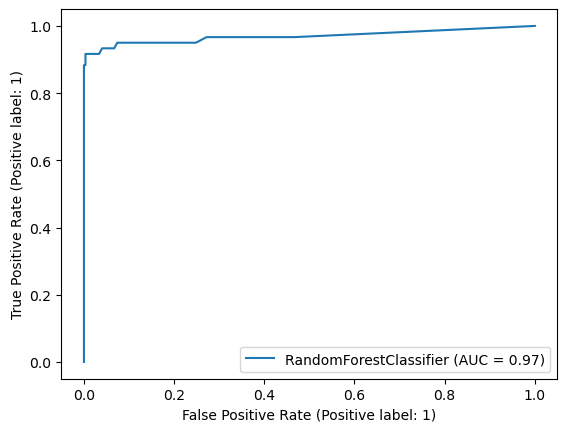

In [104]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, RocCurveDisplay

# 오버샘플링 하지 않은 경우
X = data.drop(['Time', 'Class'], axis = 1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size= 0.3, random_state=42)

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

print('Accuarcy :', rf_clf.score(X_test, y_test))
print('roc_auc score :', roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1]))

# ROC 곡선 시각화
RocCurveDisplay.from_estimator(rf_clf, X_test, y_test)
plt.show()


Accuarcy : 0.9804469273743017
roc_auc score : 0.9728747203579418


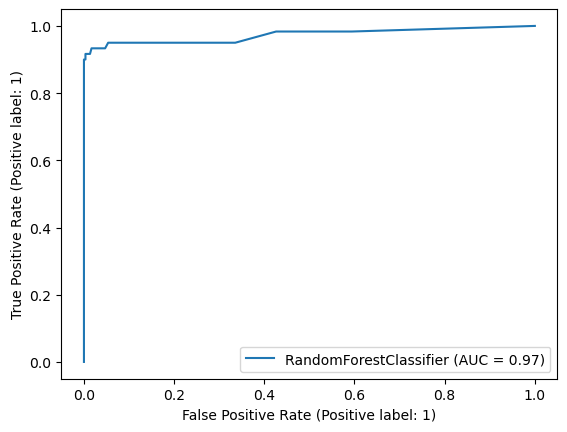

In [105]:
# RandomOverSampler

oversample1 = RandomOverSampler()
X_re_train, y_re_train = oversample1.fit_resample(X_train, y_train)

rf_clf = RandomForestClassifier()
rf_clf.fit(X_re_train, y_re_train)

y_pred = rf_clf.predict(X_test)

print('Accuarcy :', rf_clf.score(X_test, y_test))
print('roc_auc score :', roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1]))

# ROC 곡선 시각화
RocCurveDisplay.from_estimator(rf_clf, X_test, y_test)
plt.show()

Accuarcy : 0.9804469273743017
roc_auc score : 0.9730704697986577


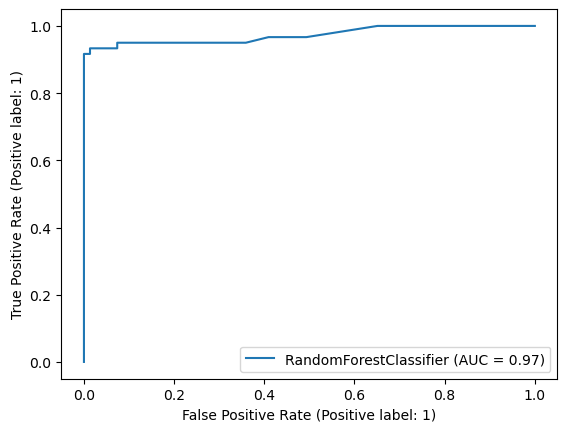

In [106]:
# SMOTE

oversample2 = SMOTE()
X_sm_train, y_sm_train = oversample2.fit_resample(X_train, y_train)

rf_clf = RandomForestClassifier()
rf_clf.fit(X_sm_train, y_sm_train)

y_pred = rf_clf.predict(X_test)

print('Accuarcy :', rf_clf.score(X_test, y_test))
print('roc_auc score :', roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1]))

# ROC 곡선 시각화
RocCurveDisplay.from_estimator(rf_clf, X_test, y_test)
plt.show()

+ roc_auc score 를 기준으로 한다면 SMOTE 이 분류분석에 가장 좋은 방법이다.

#### 3-3 현재까지 전처리한 데이터를 통해 분류 모델 수행 후 결과를 분석하시오.

+ 오버 샘플링 중에서 RandomSampling 보단 SMOTE 가 AUC 가 높은 것으로 보아 SMOTE 기법이 클래스 불균형 처리를 잘했다고 볼 수 있다.
+ 랜덤포레스트 모델의 경우는 오버샘플링을 하지 않아도 높은 예측력을 보이므로 굳이 오버샘플링을 하지 않아도 된다고 할 수 있다.

### 4. 이상탐지 모델

#### 4-1 이상탐지 모델 2가지 이상 기술, 장단점을 설명하시오.

DBSCAN
+ 데이터를 클러스터링 하기 위해 데이터를 저밀고, 고밀도로 분리하고 거리와 군집당 최소 데이터 수를 사용하여 이상 데이터를 특이치로 분리한다.
+ 장점 : 주변 데이터에서 멀어지는 데이터의 특징을 찾아서 Class 를 분류하기에 0, 1 아닌 특이점도 발견할 수 있다. 이상치를 탐색하는데 적합하다.
+ 단점 : 파라미터를 조정하는 것이 어렵다.

SVM
+ 데이터를 선형모델을 분류하고자 할 때, ㅅㄴ형으로 완전히 분류할 수 없는 데이터의 차원을 올려주어 선으로 분류할 수 있게 커널트릭을 사용하여 데이터를 분류하는 방법이다.
+ SVM 분류 모델은 데이터 공간에 존재하는 경계로 표현되며, 데이터를 분류하는 여러 경계 중에서 가장 큰 마진을 갖는 경계를 찾는다.
+ 장점 : SVM 의 경우는 비선형 분류에도 사용할 수 있고 오류 데이터에 영향이 거의 없어 과적합의 위험이 적다.
+ 단점 : 학습 속도가 느리고 해석이 어렵다.

#### 4-2 앞서 전처리한 데이터로 한 가지 이상의 탐지 모델을 구현하고, 3에서 만든 모델과 비교하시오.

DBSCAN 을 이용하여 탐지 모델을 구현하자.

In [128]:
pd.DataFrame(dbscan.labels_)
pd.DataFrame(y_train)

,Class
1156,1
917,0
777,0
353,0
29,0
...,...
382,0
123,0
503,0
880,0


In [145]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 5, min_samples= 10)
dbscan.fit(X_train)

dbscan.labels_
table = pd.concat([pd.DataFrame(y_train).reset_index(drop=True), pd.DataFrame(dbscan.labels_).reset_index(drop = True)], axis = 1)
table.columns = ['origin', 'dbscan']
table['dbscan'] = table['dbscan'].map({0 : 0, 1 : 0, -1 : 1})
table.dbscan.value_counts()

dbscan
0    450
1    385
Name: count, dtype: int64

In [146]:
table.origin.value_counts()

origin
0    695
1    140
Name: count, dtype: int64

In [150]:
# DBSCAN 은 -1이 이상치이므로 -1을 제외한 값은 0으로 하고 Confusion_matrix 로 DBSCAN 의 성능을 비교해보자.
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score

confusion_matrix(table.origin, table.dbscan)

print('Accuracy :', accuracy_score(table.origin, table.dbscan))
print('precision_score :', precision_score(table.origin, table.dbscan))
print('f1_score :', f1_score(table.origin, table.dbscan))

Accuracy : 0.6706586826347305
precision_score : 0.3246753246753247
f1_score : 0.47619047619047616


#### 4-3 데이터분석가 관점에서 3에서 만든 모델과 4에서 만든 모델을 설명하시오.

3번에서는 오버샘플링을 통해 클래스불균형 데이터의 문제를 해결하고자 했다. 랜덤오버샘플링과 SMOTE 모델을 이용했는데 SMOTE 모델이 과적합 위험이 적은 오버샘플링으로써 높은 성능을 보였다.  
4번에서는 이상탐지 모델인 DBSCAN 모델을 사용했다. 이상치 탐지하는데 좋은 모델이지만 eps, min_samples 등 파라미터를 수정해주는게 어려워 성능이 좋진 않았다.

## 통계분석

### 1번
2년 전 제품 생산량이 100,000개, 1년 전 제품 생산량이 150,000개, 그 후 팩토리 기술의 상승으로 제품 생산량이 250,000개 되었을 때, 연평균 상승률의 대푯값을 구하시오.

In [157]:
# 기하평균을 사용하자
from scipy.stats import gmean
data = [100000, 150000, 250000]

data1 = [150000 / 100000, 250000 / 150000]
gmean(data1)

1.5811388300841898

연평균 상승률은 158.1% 이다.

### 2. 12건의 광고시간을 측정한 데이터에서 평균은 15.5초, 분산은 3.2초였다. 이때 광고시간의 90% 신뢰구간을 구하시오.

In [160]:
from scipy.stats import t

n = 12
mu = 15.5
s = 3.2 ** 0.5
df = n - 1

t.interval(alpha = 0.9, loc = 15.5, scale = s, df = df)


C:\Users\USER\AppData\Local\Temp\ipykernel_19296\3368128728.py:8: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  t.interval(alpha = 0.9, loc = 15.5, scale = s, df = df)


(12.287423572494966, 18.71257642750503)

### 3. 강의 상류와 하류의 생물 다양성 점수에 차이가 있는지 유의수준 0.1 하에 검정하시오
단, 같은 강에서 상류와 하류는 서로 독립적이지 않으며 종속적인 관계가 있음, 정규성을 만족한다고 가정

#### 3-1 귀무가설과 대립가설을 세우시오.

+ H0 : 상류와 하류의 생물 다양성 점수에 차이가 없다.
+ H1 : 상류와 하류의 생물 다양성 점수에 차이가 있다.

#### 3-2 검정 통계량과 유의 확률을 구하고, 연구가설 채택여부를 검정하시오.

In [164]:
from scipy.stats import chi2_contingency
data = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/27_problem7.csv')
data

,river,up,down
0,a,57.1,45.7
1,b,51.6,37.2
2,c,53.9,53.3
3,d,59.0,54.3
4,e,57.5,46.3


In [165]:
# 대응표본 t 검정을 실시하지
# 정규성을 만족하니 ttest_rel
from scipy.stats import ttest_rel

ttest_rel(data.up, data.down)

TtestResult(statistic=3.3526056764717995, pvalue=0.028499777234053288, df=4)

+ pvalue 가 유의수준 0.05보다 작으므로 귀무가설을 기각한다. 즉 상류와 하류의 생물의 다양성 차이는 있다.

### 4. user_counts 를 종속변수로 하는 데이터이다.

#### 4-1 분위수 회귀분석(Quantile Regression) 을 사용하여 회귀계수를 구하시오

In [167]:
from scipy.stats import chi2_contingency
data = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/27_problem8.csv')
data

,temperature,wind,precipitation,user_counts
0,10.400000,4.600000,0.844944,6368
1,5.666667,4.625000,0.040860,5902
2,4.933333,4.725000,0.008696,6226
3,3.400000,2.675000,0.156989,5829
4,8.900000,3.950000,7.988462,7589
...,...,...,...,...
2092,3.500000,2.100000,0.024096,5430
2093,8.233333,2.000000,16.843820,2125
2094,9.500000,3.666667,11.550575,6008
2095,4.800000,1.200000,0.104651,4929


In [170]:
from sklearn.linear_model import QuantileRegressor
from sklearn.model_selection import train_test_split
X = data.drop(['user_counts'], axis = 1)
y = data['user_counts']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 42)
quan_reg = QuantileRegressor()
quan_reg.fit(X_train, y_train)

quan_reg.coef_

c:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_quantile.py:186: FutureWarning: The default solver will change from 'interior-point' to 'highs' in version 1.4. Set `solver='highs'` or to the desired solver to silence this warning.
  warnings.warn(
c:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_quantile.py:295: ConvergenceWarning: Linear programming for QuantileRegressor did not succeed.
Status is 4: Numerical difficulties encountered.
Result message of linprog:
The solution does not satisfy the constraints within the required tolerance of 3.16E-04, yet no errors were raised and there is no certificate of infeasibility or unboundedness. Check whether the slack and constraint residuals are acceptable; if not, consider enabling presolve, adjusting the tolerance option(s), and/or using a different method. Please consider submitting a bug report.
  warnings.warn(


array([ 2.06518122e+02, -2.56451601e-06, -1.25681987e-06])

#### 4-2 4-1 의 회귀계수를 활용하여 temperature 10.5, wind 8.2 precipitation 3.5 일 때의 user_counts 를 구하여라

In [174]:
np.dot(quan_reg.coef_ , np.array([10.5, 8.2, 3.5]))

2168.4402601174925

### 5. 지하철 호선과 월별, 승객 수 간 상관관계가 있는지 확인하시오.

#### 5-1 귀무가설과 대립가설을 설정하시오.

1. 상호작용효과 검정에 대한 가설
+ H0 : 지하철 호선과 월별, 승객 수 간 상관관계가 없다.
+ H1 : 지하철 호선과 월별, 승객 수 간 상관관계가 있다.

2. 주효과 검정에 대한 가설
+ H0 : 지하철 호선에 따른 승객 수의 차이는 없다.
+ H1 : 지하철 호선에 따른 승객 수의 차이는 있다.
<br/>
+ H0 : 월별에 따른 승객 수의 차이는 없다.
+ H1 : 월별에 따른 승객 수의 차이는 있다.

#### 5-2 Type III Anova 를 사용하여 상관관계가 있는지 검정하시오.

In [177]:
data = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/27_problem9.csv')
data

,line,month,total
0,1,1,1310
1,1,2,1300
2,1,3,1305
3,1,4,1200
4,1,5,1301
...,...,...,...
67,3,8,1365
68,3,9,1374
69,3,10,1337
70,3,11,1332


In [182]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'total ~ C(line)*C(month)'
model = ols(formula, data).fit()
aov_table = anova_lm(model, typ = 2)
aov_table

,sum_sq,df,F,PR(>F)
C(line),2.147444e+06,2.0,10362.998525,2.007247e-50
C(month),3.206533e+04,11.0,28.134341,2.103496e-14
C(line):C(month),9.696908e+04,22.0,42.540665,1.582232e-19
Residual,3.730000e+03,36.0,NaN,NaN


+ 상호작용효과 검정에 대한 가설은 p값이 0.01보다 작으므로 귀무가설을 기각한다. 즉 지하철 호선과 월별, 승객 수 간 상관관계가 있다.
+ 주효과 검정에 대한 가설은 두 변수 모드 p값이 0.05보다 작으므로 귀무가설을 기각한다. 즉 월별과 지하철 호선에 따라 승객 수는 각각 차이가 존재한다.

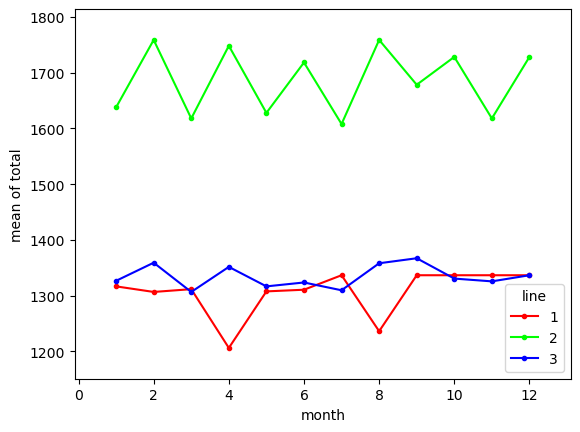

In [186]:
# 상호작용그래프를 그려보자.
from statsmodels.graphics.factorplots import interaction_plot

interaction_plot(data.month, data.line, data.total)

plt.show()

교차하는 부분이 없으면 서로 상관관계가 없다고 할 수 있는데 그래프를 보면 month 와 line 에 따라 승객수 그래프가 교차하는 부분이 많으니 상관관계가 있다고 할 수 있다.